In [1]:
from autoencoder import autoencoder_model
import numpy as np
import cv2
#get the model
model = autoencoder_model()

#load model weights
model.load_weights('modelh5/autoencoder.h5')

2021-09-26 22:14:11.241612: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


(None, 700)
(None, 784)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 7

2021-09-26 22:14:11.989995: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-26 22:14:11.990422: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-26 22:14:12.025233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 22:14:12.025654: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.635GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBandwidth: 573.69GiB/s
2021-09-26 22:14:12.025670: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-09-26 22:14:12.026599: I tensorflow/stream_executor/platform/defau

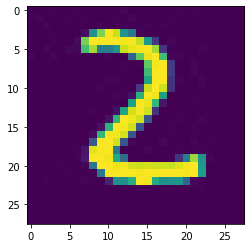

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# img_path = '/content/Cat03.jpg'
img_pth = 'test_data/2_3258test_.jpg'
#Input Image for Layer visualization
img = cv2.imread(img_pth, 0)/255.
plt.imshow(img)

img = np.expand_dims(img, axis=0)

In [3]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['input_1', 'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1', 'dense_2']


In [4]:
from tensorflow.keras.models import Model

dense1_output = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
dense1_pred = dense1_output.predict(img)
# max_pooling2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_11').output)
# conv2d_12_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_12').output)
# max_pooling2d_12_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_12').output)

2021-09-26 22:14:12.730660: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 22:14:12.730901: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz
2021-09-26 22:14:12.781628: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-09-26 22:14:12.913558: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-09-26 22:14:13.500994: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-09-26 22:14:13.523510: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


In [5]:
dense1_pred.shape #printing shape
#single array as my model has dense layer at it's second last

(1, 400)

In [6]:
plt.imshow(dense1_pred.reshape(20, 20)) #reshaping for visualization